# Lab 2, Part 1 - Decision Tree & Random Forest

###  Member
-    Nattapat Yuvasuta, <b>59070501028</b><br>
-    Niti Buesamae, <b>59070501047</b>

## Lab Instruction 

In this lab, you are to create a Decision Tree and Random Forest model  to predict the sale price of houses **SalePrice = (Low, Medium, High)** from a given set of attributes. <br>

The data file is`lab2_dataset.csv` <br>

Note that you need to explore and process/drop attributes, <br>
and map numerical values of sale prices to categorical values (Low, Medium, High)

###  1. Import the Dataset and Learn About the Data

In [1]:
import pandas as pd
df = pd.read_csv("lab2_dataset.csv")
print(pd.__version__) # You should use version 0.21+

0.23.0


In [2]:
print(df.shape)
df.info()
df.head()

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st     

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


###  2. Preprocessing
Try to think about what data's feature that the model accept and how the model compute those data. Then use techniques that you have learned to preprocess the data. 

**For example:** 
-  Remove non-informative features
-  Remove features with too many NA
-  Remove rows with incomplete data
-  Remove features with highly unbalanced labels
-  Encode categorical variables as appropriate

Then, create one dataframe for the features and another frame for the output variable.

In [3]:
null_loc = df.columns[df.isnull().sum()>0]
df[null_loc].isnull().sum()/1460

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [4]:
del df['Alley']
del df['FireplaceQu']
del df['PoolQC']
del df['Fence']
del df['MiscFeature']
print(df.shape)

(1460, 76)


In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [6]:
#delete non-informative data 
'''
    Id
    YearBuilt        
    YearRemodAdd     
    YrSold           
'''
del df['Id']
del df['YearBuilt']
del df['YearRemodAdd']
del df['YrSold']

df.shape

(1460, 72)

In [7]:
df.dropna(how='any').shape

(1094, 72)

In [8]:
df.dropna(how='any').head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,WD,Normal,250000


In [9]:
df = df.dropna(how = 'any')

In [10]:
'''x = df.select_dtypes(['object','bool']).columns
n = 0
for i in x:
    print("---> %s"%i)
    t = df[i].value_counts()
    s  = df[i].value_counts().sum()
    M = max(t)
    B = (M/s)*100
    print(B)
    if B > 75.0:
        print("unbalance")
        n = n+1
    else:
        print("balance")
print(n)
'''

'x = df.select_dtypes([\'object\',\'bool\']).columns\nn = 0\nfor i in x:\n    print("---> %s"%i)\n    t = df[i].value_counts()\n    s  = df[i].value_counts().sum()\n    M = max(t)\n    B = (M/s)*100\n    print(B)\n    if B > 75.0:\n        print("unbalance")\n        n = n+1\n    else:\n        print("balance")\nprint(n)\n'

In [11]:
df = pd.concat([pd.get_dummies(df.select_dtypes(include=['object'])),
                   df.select_dtypes(include=['float64','int64'])]
                   , axis=1)

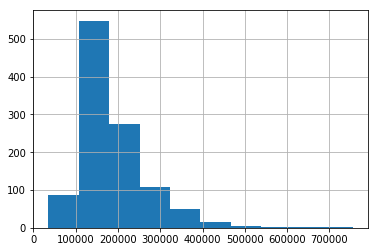

In [12]:
#qcut
import matplotlib as plt
%matplotlib inline

df.SalePrice.hist()

In [13]:
df ['SalePrice']= pd.qcut(df.SalePrice, q= [0.0,0.34,0.66,1], labels = ['Low','Medium','High'])

In [14]:
df.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,0,0,0,1,0,0,1,0,0,0,...,548,0,61,0,0,0,0,0,2,High
1,0,0,0,1,0,0,1,0,0,0,...,460,298,0,0,0,0,0,0,5,Medium
2,0,0,0,1,0,0,1,1,0,0,...,608,0,42,0,0,0,0,0,9,High
3,0,0,0,1,0,0,1,1,0,0,...,642,0,35,272,0,0,0,0,2,Low
4,0,0,0,1,0,0,1,1,0,0,...,836,192,84,0,0,0,0,0,12,High


In [15]:
df.select_dtypes(['object','bool']).columns

Index([], dtype='object')

In [16]:
df.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,0,0,0,1,0,0,1,0,0,0,...,548,0,61,0,0,0,0,0,2,High
1,0,0,0,1,0,0,1,0,0,0,...,460,298,0,0,0,0,0,0,5,Medium
2,0,0,0,1,0,0,1,1,0,0,...,608,0,42,0,0,0,0,0,9,High
3,0,0,0,1,0,0,1,1,0,0,...,642,0,35,272,0,0,0,0,2,Low
4,0,0,0,1,0,0,1,1,0,0,...,836,192,84,0,0,0,0,0,12,High


In [17]:
df.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,0,0,0,1,0,0,1,0,0,0,...,548,0,61,0,0,0,0,0,2,High
1,0,0,0,1,0,0,1,0,0,0,...,460,298,0,0,0,0,0,0,5,Medium
2,0,0,0,1,0,0,1,1,0,0,...,608,0,42,0,0,0,0,0,9,High
3,0,0,0,1,0,0,1,1,0,0,...,642,0,35,272,0,0,0,0,2,Low
4,0,0,0,1,0,0,1,1,0,0,...,836,192,84,0,0,0,0,0,12,High


## Decision Tree Classifier

Use both Hold-out and K-fold CV to evaluate your model

Analyze the model results. Do you think the model is good enough? <br>
Does it overfit or underfit the data? <br>
Explain and provide evidence to support your claims.
Look at various classification matrix of train and test sets.



### 3.1 Hold-out evaluation

In [18]:
lab_train_x = df.drop(['SalePrice'],axis = 1)
lab_train_y = df.SalePrice
lab_train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Columns: 256 entries, MSZoning_C (all) to MoSold
dtypes: float64(3), int64(30), uint8(223)
memory usage: 528.8 KB


In [19]:
from sklearn.model_selection import train_test_split
#using Hold-Out method
x_train, x_test, y_train, y_test = train_test_split(lab_train_x,lab_train_y,
                                                    test_size = 0.4)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(656, 256) (656,)
(438, 256) (438,)


Evaluate and analyse the result using classification_report module and confusion matrix
- See http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

use min_samples_split =  70  to avoid overfitting tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=None,min_samples_split=70)
dt_clf = dt_clf.fit(x_train, y_train)
dt_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=70,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
yhat_train = dt_clf.predict(x_train) 
yhat_test = dt_clf.predict(x_test)
yhat_test_prob = dt_clf.predict_proba(x_test)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_train, yhat_train))

             precision    recall  f1-score   support

       High       0.83      0.90      0.86       217
        Low       0.78      0.85      0.82       219
     Medium       0.75      0.62      0.68       220

avg / total       0.79      0.79      0.79       656



In [23]:
print(classification_report(y_test, yhat_test))

             precision    recall  f1-score   support

       High       0.82      0.82      0.82       154
        Low       0.77      0.82      0.79       154
     Medium       0.61      0.57      0.59       130

avg / total       0.74      0.74      0.74       438



### Visualize  Tree 
- We will use https://github.com/xflr6/graphviz

To install this package, type the following command in the Anaconda Prompt.

```conda install -c conda-forge graphviz python-graphviz ```

Run the following cell to visualize your graph

In [24]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(dt_clf, out_file=None,
                                feature_names=x_train.columns,
                                class_names=['Low','Medium','High'], 
                                filled=True, 
                                rounded=True, 
                                special_characters=True, 
                                proportion=True)
graph = graphviz.Source(dot_data) 
graph.render("tree",view = True)

'tree.pdf'

The output from the code above is a pdf file that have a visualization of your decision tree model. Open the pdf file and analyse your model

### 3.2 K-Fold CV 


use k-fold by divide into 5 parts 
and show mean of accuracy

In [25]:
#use K-fold
from sklearn.model_selection import cross_val_score

score = cross_val_score(DecisionTreeClassifier(),x_train,y_train,cv = 5)
print(score)
print("5 fold CV acc : %1.4f"%score.mean())

[0.62878788 0.78787879 0.73282443 0.70229008 0.71538462]
5 fold CV acc : 0.7134


# <font color='red'> Answer:</font>



## Random Forest Classifier

Use both Hold-out and K-fold CV to evaluate the classifier. 

Analyze the model results. 
- Do you think the model is good enough? Does it overfit or underfit the data? 
- How does it perform compared to basic decision tree classifier ? <br>

Explain and provide evidence to support your claims.

### 4.1 Hold-out evaluation

In [26]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(min_samples_split=70, max_depth=None)
rf_clf = rf_clf.fit(x_train, y_train)
rf_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=70,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
yhat_train = rf_clf.predict(x_train) 
yhat_test = rf_clf.predict(x_test)
yhat_test_prob = rf_clf.predict_proba(x_test)

Evaluate and analyse your result using classification_report module and confusion matrix
- See http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [28]:
print(classification_report(y_train, yhat_train))
print(classification_report(y_test, yhat_test))

             precision    recall  f1-score   support

       High       0.87      0.89      0.88       217
        Low       0.83      0.85      0.84       219
     Medium       0.75      0.71      0.73       220

avg / total       0.82      0.82      0.82       656

             precision    recall  f1-score   support

       High       0.87      0.86      0.87       154
        Low       0.86      0.82      0.84       154
     Medium       0.65      0.70      0.68       130

avg / total       0.80      0.80      0.80       438



### 4.2 K-Fold CV with accuracy metric


In [29]:
#use K-fold for randomforest
from sklearn.model_selection import cross_val_score

score = cross_val_score(RandomForestClassifier(),x_train,y_train,cv = 5)
print(score)
print("5 fold CV acc : %1.4f"%score.mean())

[0.75       0.78787879 0.80916031 0.76335878 0.76923077]
5 fold CV acc : 0.7759


### 4.3 Evaluate using multiple metrics
- precision: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
- recall: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

show accuracy precision recall for multiple metric use average = micro because target is multiclass

In [30]:
from sklearn.model_selection import cross_validate
scoring = ['accuracy','precision_micro', 'recall_micro']
#scoring = ['precision','recall']
scores = cross_validate(DecisionTreeClassifier(), x_train,y_train,scoring=scoring, cv = 5,return_train_score=True )
pd.DataFrame(scores)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_micro,train_precision_micro,test_recall_micro,train_recall_micro
0,0.109380,0.031249,0.666667,1.0,0.666667,1.0,0.666667,1.0
1,0.078122,0.015630,0.696970,1.0,0.696970,1.0,0.696970,1.0
2,0.062502,0.031249,0.709924,1.0,0.709924,1.0,0.709924,1.0
3,0.062501,0.015626,0.687023,1.0,0.687023,1.0,0.687023,1.0
4,0.046873,0.015627,0.730769,1.0,0.730769,1.0,0.730769,1.0


# <font color='red'> Answer:</font>

### 4.4 Parameter Tuning using GridSearch

Try grid search on parameters max_depth, max_features, and n_estimators.
Determine which parameter set  achieve the best result. <br>


- See more: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

use gridSearch to find all given comblnation

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[3,5,7], 'max_features':[5, 10]}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid,return_train_score=True)
clf.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 5, 7], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [32]:
s = pd.DataFrame(clf.cv_results_)

In [33]:
s.sort_values('mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
3,0.015625,0.000002,0.000000,0.000000,5,10,"{'max_depth': 5, 'max_features': 10}",0.681818,0.655963,0.688073,0.675305,0.013883,1,0.793578,0.771689,0.730594,0.765287,0.026109
5,0.010417,0.007366,0.000000,0.000000,7,10,"{'max_depth': 7, 'max_features': 10}",0.645455,0.674312,0.697248,0.672256,0.021210,2,0.848624,0.840183,0.810502,0.833103,0.016348
4,0.005208,0.007365,0.010415,0.007364,7,5,"{'max_depth': 7, 'max_features': 5}",0.622727,0.665138,0.678899,0.655488,0.023938,3,0.672018,0.796804,0.831050,0.766624,0.068342
2,0.010417,0.007366,0.005209,0.007367,5,5,"{'max_depth': 5, 'max_features': 5}",0.631818,0.559633,0.660550,0.617378,0.042396,4,0.752294,0.627854,0.719178,0.699775,0.052622
1,0.005208,0.007366,0.000000,0.000000,3,10,"{'max_depth': 3, 'max_features': 10}",0.595455,0.619266,0.619266,0.611280,0.011242,5,0.591743,0.630137,0.655251,0.625710,0.026115
0,0.010416,0.007365,0.010417,0.007366,3,5,"{'max_depth': 3, 'max_features': 5}",0.563636,0.399083,0.509174,0.490854,0.068460,6,0.582569,0.404110,0.527397,0.504692,0.074604


# <font color='red'> Answer:</font>